# Aunalytics Data Challenge
### By: Zachary Dougherty
## Problem 2
Perform a segmentation study on the
dataset to display useful information using
any visualization library.

In [2]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format = 'retina'

In [3]:
colors = ["#3c4955","#93b8db"]

train = pd.read_csv("data/au_train.csv")
train['class'] = LabelEncoder().fit_transform(train['class'])

## Splitting up by the target
First, let's split the employees into groups based on their earnings.

In [4]:
under_eq50 = train[train['class'] == 0]
over50 = train[train['class'] == 1]

Now let's look at the frequency of occupations for each class.

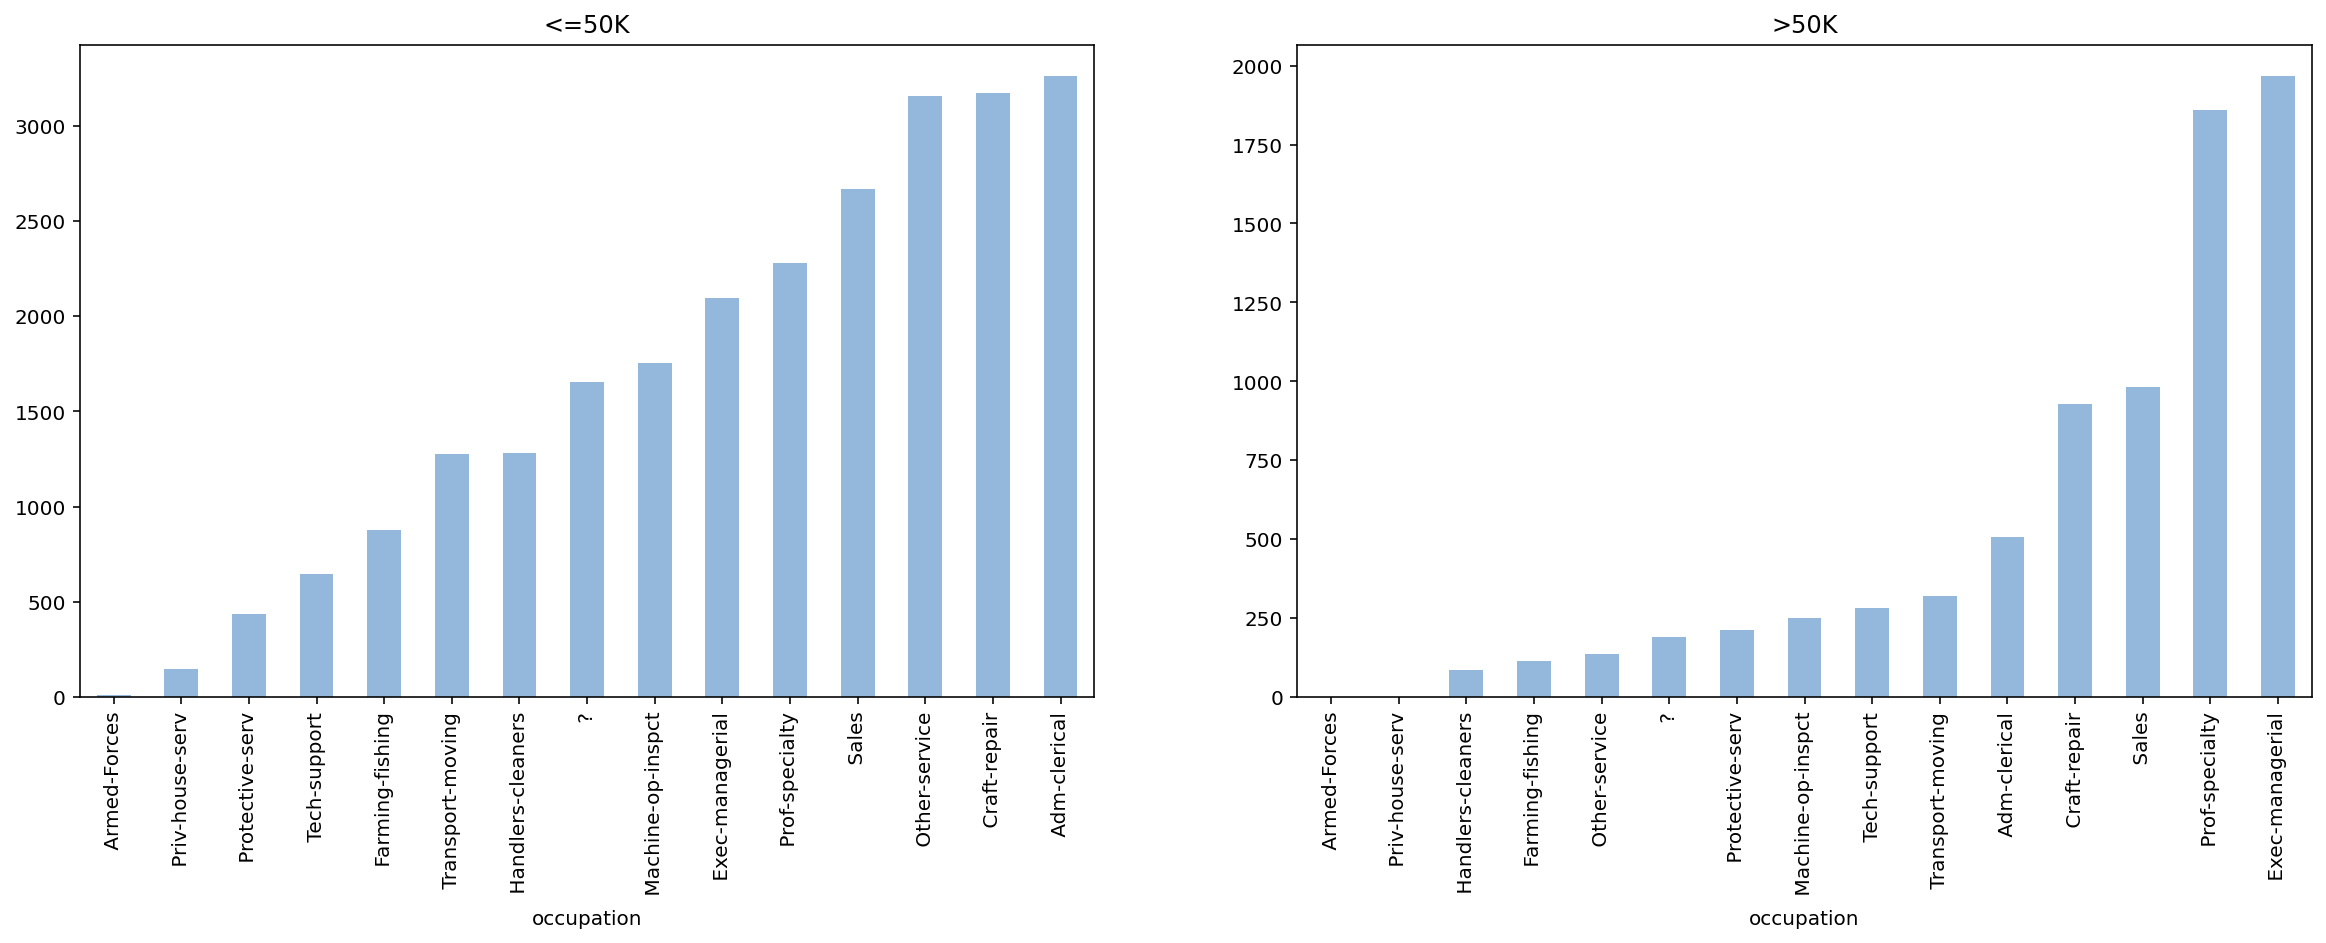

In [228]:
fig, axes = plt.subplots(ncols=2, figsize=(20,6))
axes = axes.flatten()

counts = under_eq50.groupby('occupation').count()['class'].sort_values()
counts.plot.bar(title='<=50K', facecolor=colors[1], ax=axes[0])

counts_over = over50.groupby('occupation').count()['class'].sort_values()
counts_over.plot.bar(title='>50K', facecolor=colors[1], ax=axes[1])
plt.show()

From these bar charts, we can see that Executives, Managers, and specialty positions have the highest number of high earning people while Clerical and Repair positions have the highest number of low earners. One interesting find is that Sales is a top 4 occupation in both categories which could indicate that Sales people have a wide range of salaries.

Let's take a look at the age distribution of employees.

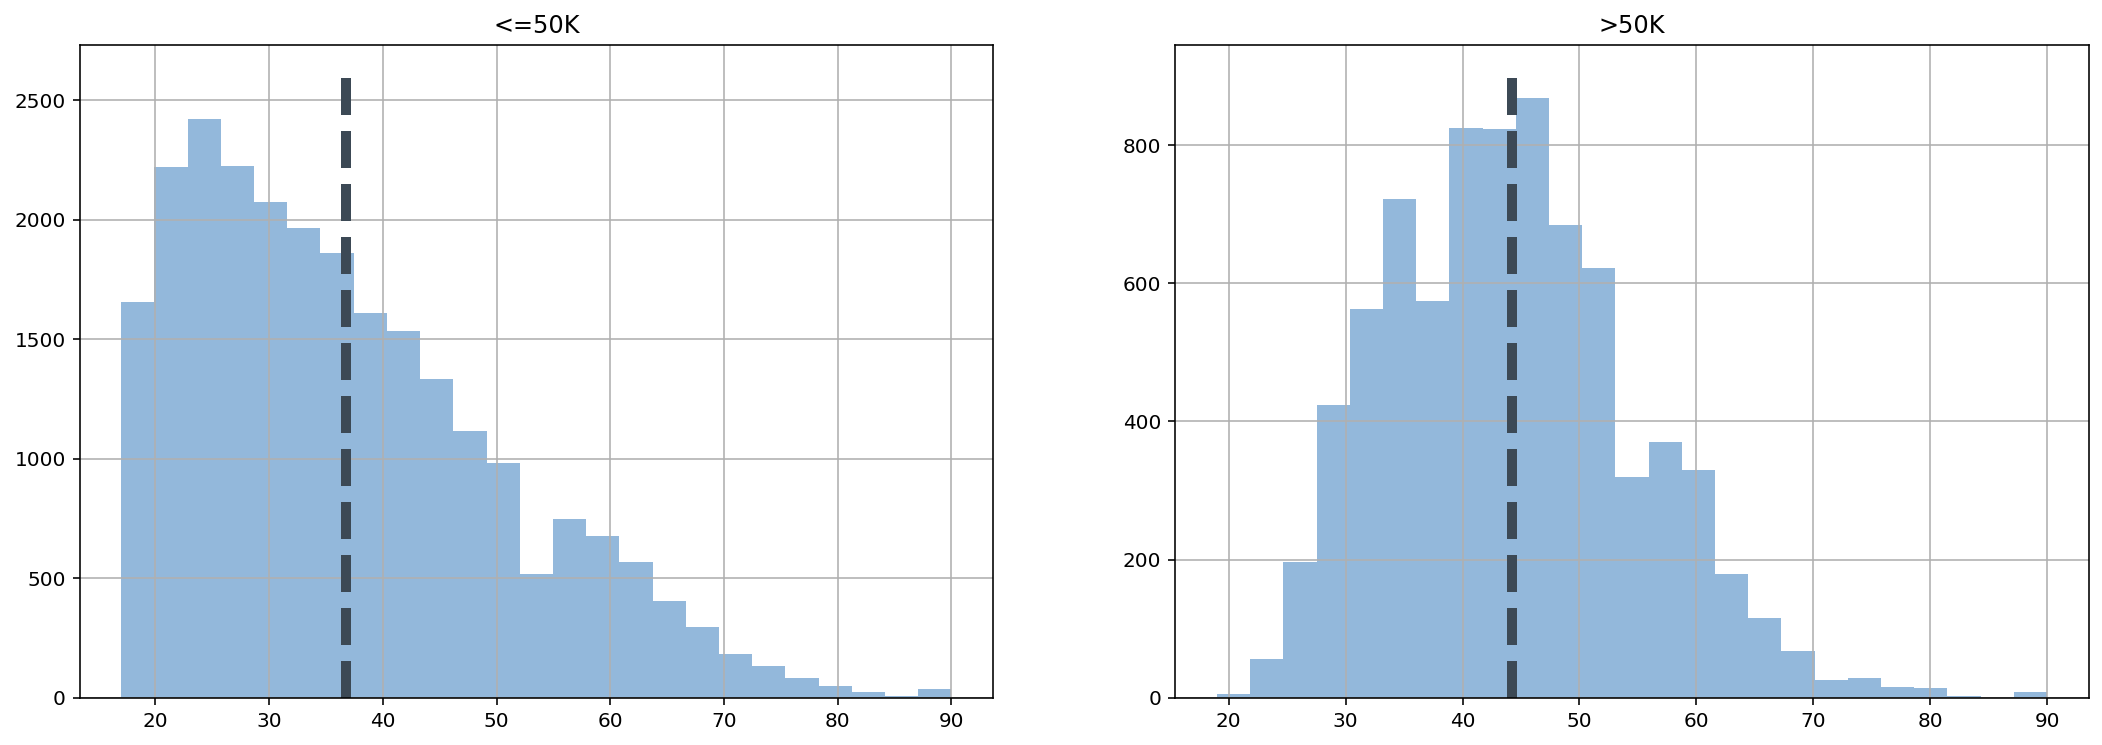

In [213]:
fig, axes = plt.subplots(ncols=2, figsize=(18,6))
axes = axes.flatten()

axes[0].set_title("<=50K")
axes[1].set_title(">50K")

under_eq50['age'].hist(ax=axes[0], bins=25, facecolor=colors[1])
over50['age'].hist(ax=axes[1], bins=25, facecolor=colors[1])

# plot the mean age
axes[0].plot([under_eq50['age'].mean(), under_eq50['age'].mean()], [0,2600], '--', lw=5, c=colors[0])
axes[1].plot([over50['age'].mean(), over50['age'].mean()], [0,900], '--', lw=5, c=colors[0])

plt.show()

We see what we would expect from the first histogram, most low earners are younger and follow a right tailed distribution, indicating that people usually earn more money as they get older. The second histogram is a bit more interesting, as we see ages for people earning over 50K a year are approximately normally distributed. This shows that the majority of high earners are from the ages of 35-50, with very few high earners in the college student and elderly age ranges.

What about sex? Let's find out if wages are fairly distributed across male and female employees.

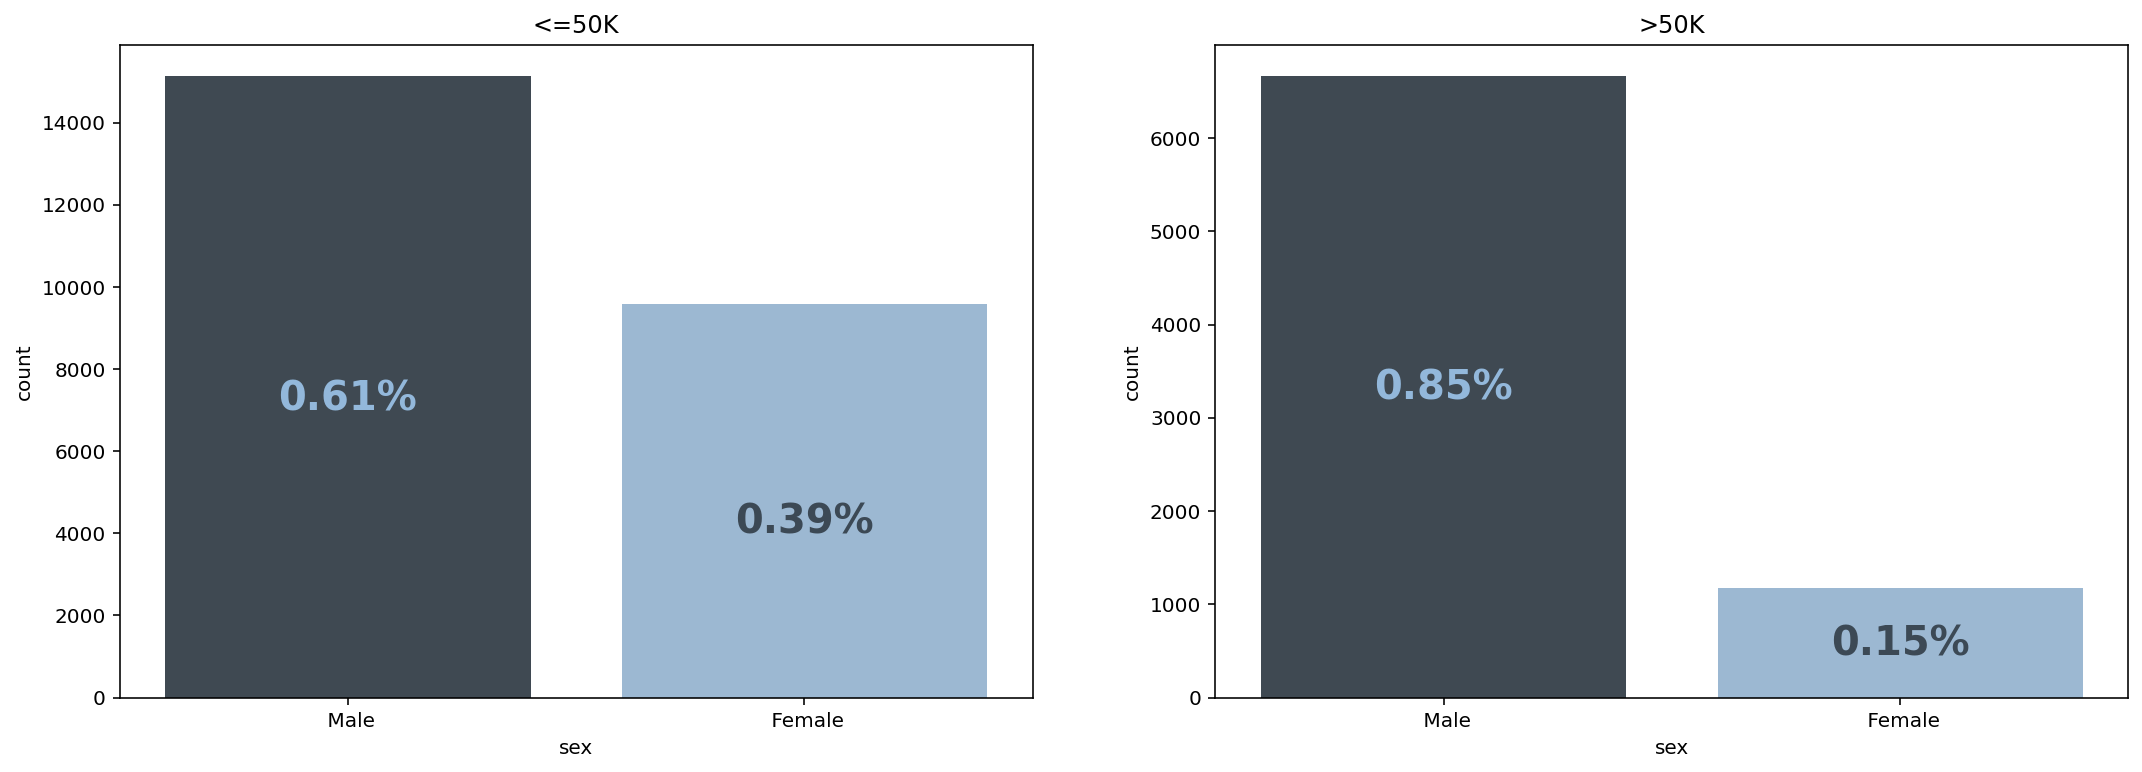

In [214]:
fig, axes = plt.subplots(ncols=2, figsize=(18,6))
axes = axes.flatten()

axes[0].set_title("<=50K")
sns.countplot(x=under_eq50['sex'], ax=axes[0], palette=colors)
pcts = under_eq50['sex'].value_counts() / under_eq50.shape[0]
axes[0].text(0, 7000, f'{pcts[0]:.2f}%', fontsize=20, ha='center', color=colors[1], fontweight='bold')
axes[0].text(1, 4000, f'{pcts[1]:.2f}%', fontsize=20, ha='center', color=colors[0], fontweight='bold')


axes[1].set_title(">50K")
sns.countplot(x=over50['sex'], ax=axes[1], palette=colors)
pcts = over50['sex'].value_counts() / over50.shape[0]
axes[1].text(0, 3200, f'{pcts[0]:.2f}%', fontsize=20, ha='center', color=colors[1], fontweight='bold')
axes[1].text(1, 450, f'{pcts[1]:.2f}%', fontsize=20, ha='center', color=colors[0], fontweight='bold')


plt.show()

These countplots demonstrate the desparity between wages for men and women across wealth groups. In a fair system, we would expect to see similar proportions across groups, but instead we see that the percentage of women earners making under 50K is almost 4 times larger than those making over 50K.

I've heard from people before that usually the more money you make or the higher on the corporate ladder you go, the less work you actually have to do. Let's find out if that's true by checking the distribution of hours per week worked for each of these groups.

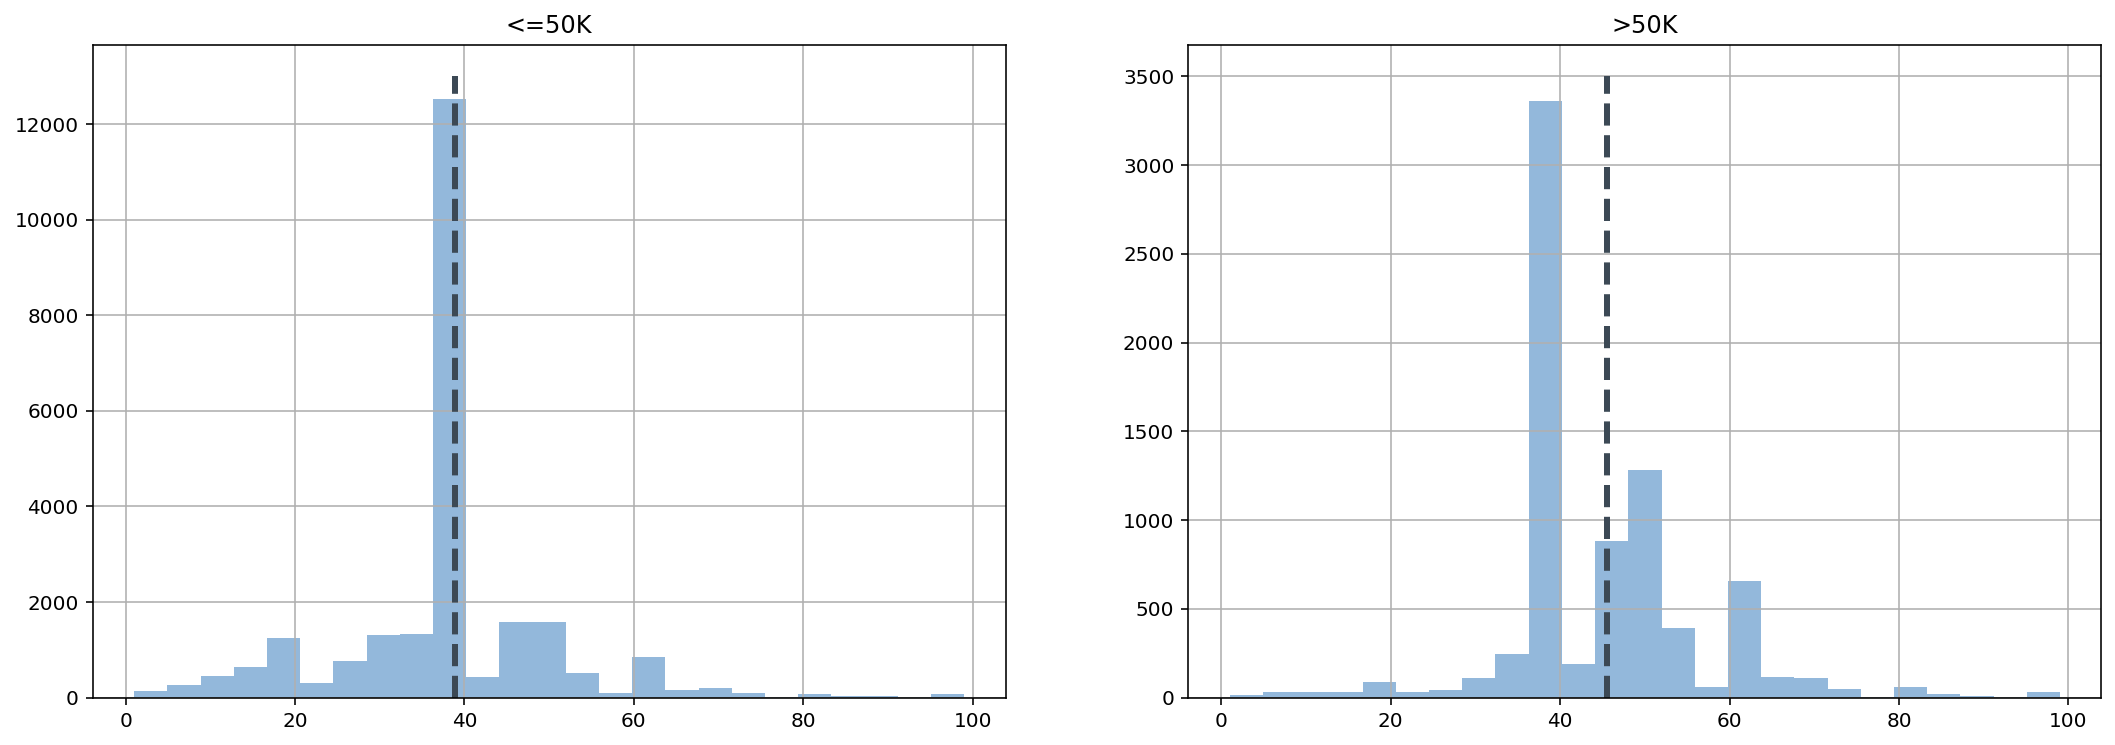

In [215]:
fig, axes = plt.subplots(ncols=2, figsize=(18,6))
axes = axes.flatten()

axes[0].set_title("<=50K")
axes[1].set_title(">50K")

under_eq50['hours-per-week'].hist(ax=axes[0], bins=25, facecolor=colors[1])
over50['hours-per-week'].hist(ax=axes[1], bins=25, facecolor=colors[1])

# plot the mean age
axes[0].plot([under_eq50['hours-per-week'].mean(), under_eq50['hours-per-week'].mean()], [0,13_000], '--', lw=3, c=colors[0])
axes[1].plot([over50['hours-per-week'].mean(), over50['hours-per-week'].mean()], [0,3500], '--', lw=3, c=colors[0])

plt.show()

Based on this plot, it looks like people earning more actually work more hours throughout the week, though the average number is not very different across the groups.

## Relationships between variables
Let's now look relationships between other variables that don't include the target.

First, let's look at the age distribution of people in different occupations.

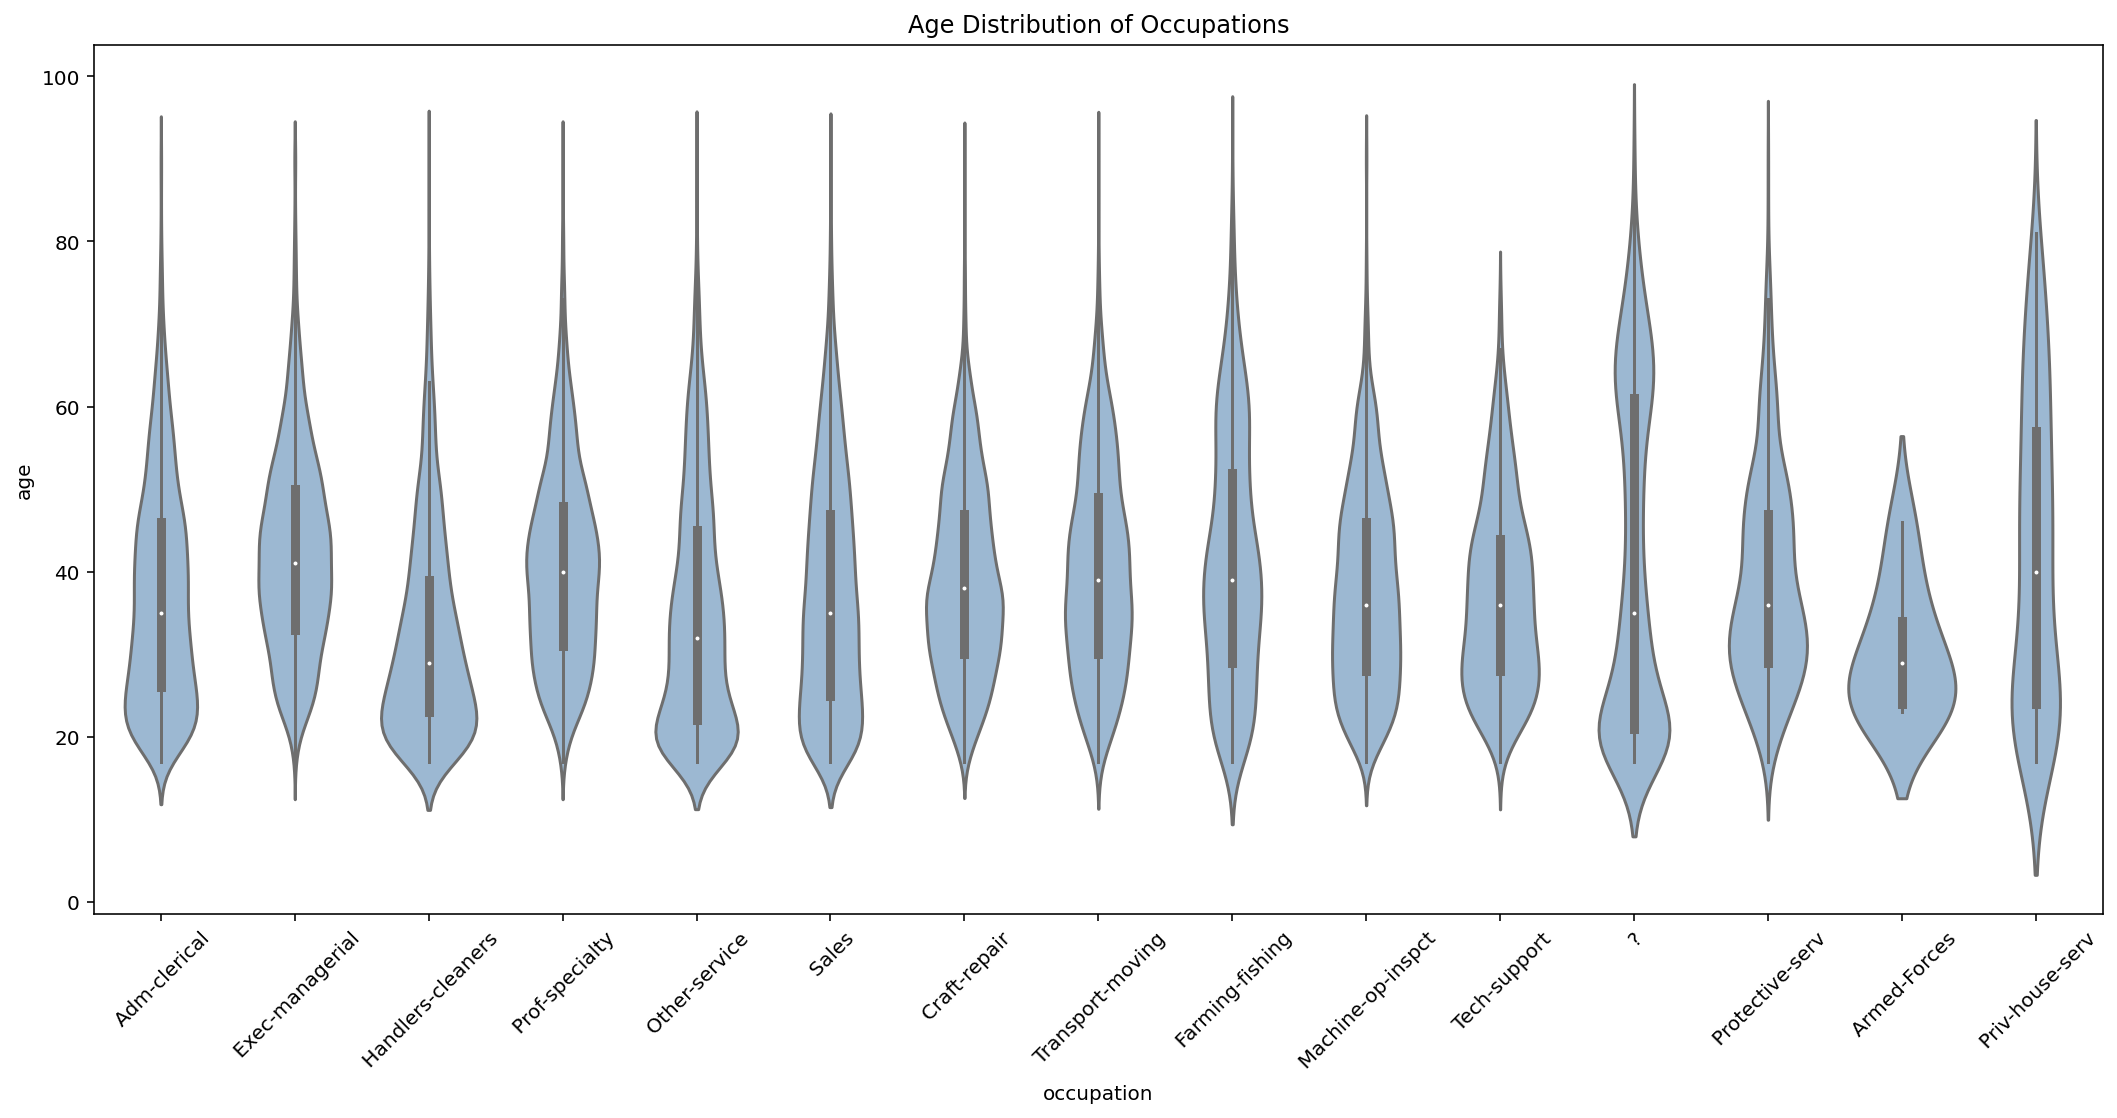

In [216]:
fig, ax = plt.subplots(figsize=(18,8))

ax.set_xticklabels(train['occupation'].unique(), rotation=45)
ax.set_title("Age Distribution of Occupations")
sns.violinplot(x=train['occupation'], y=train['age'], color=colors[1], ax=ax)
plt.show()

A few key takewaways from this violinplot are that the the 'Handlers-cleaners' and 'Armed-Forces' are mostly younger people. Most other known professions seem to have even distributions from young to old, with 'Exec-managerial', 'Prof-specialty' and 'Craft-repair' having higher density around the 40 year old mark.

Let's now take a look at the race variable. It is very important when developing machine learning algorithms to ensure this variable is only included in a fair way. Let's take a look at the distribution of race in our data and the distributions of other variables across different racial groups.

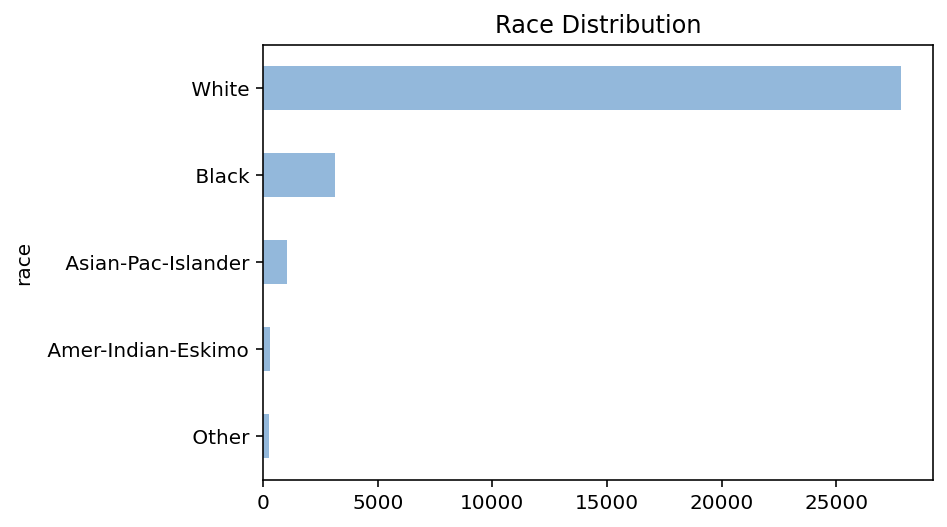

In [217]:
train.groupby('race')['age'].count().sort_values().plot.barh(facecolor=colors[1], title="Race Distribution")
plt.show()

We can see that white people make up the majority of our dataset. In order to create an ethical system, we need to perform more data collection for 
minority groups.

Let's check out some variables across these groups. Since the minority classes are so small, the data is not necessarily representative of the entire populations, but we will still observe what is present in this dataset. First, let's find out how many hours a week people from each group work.

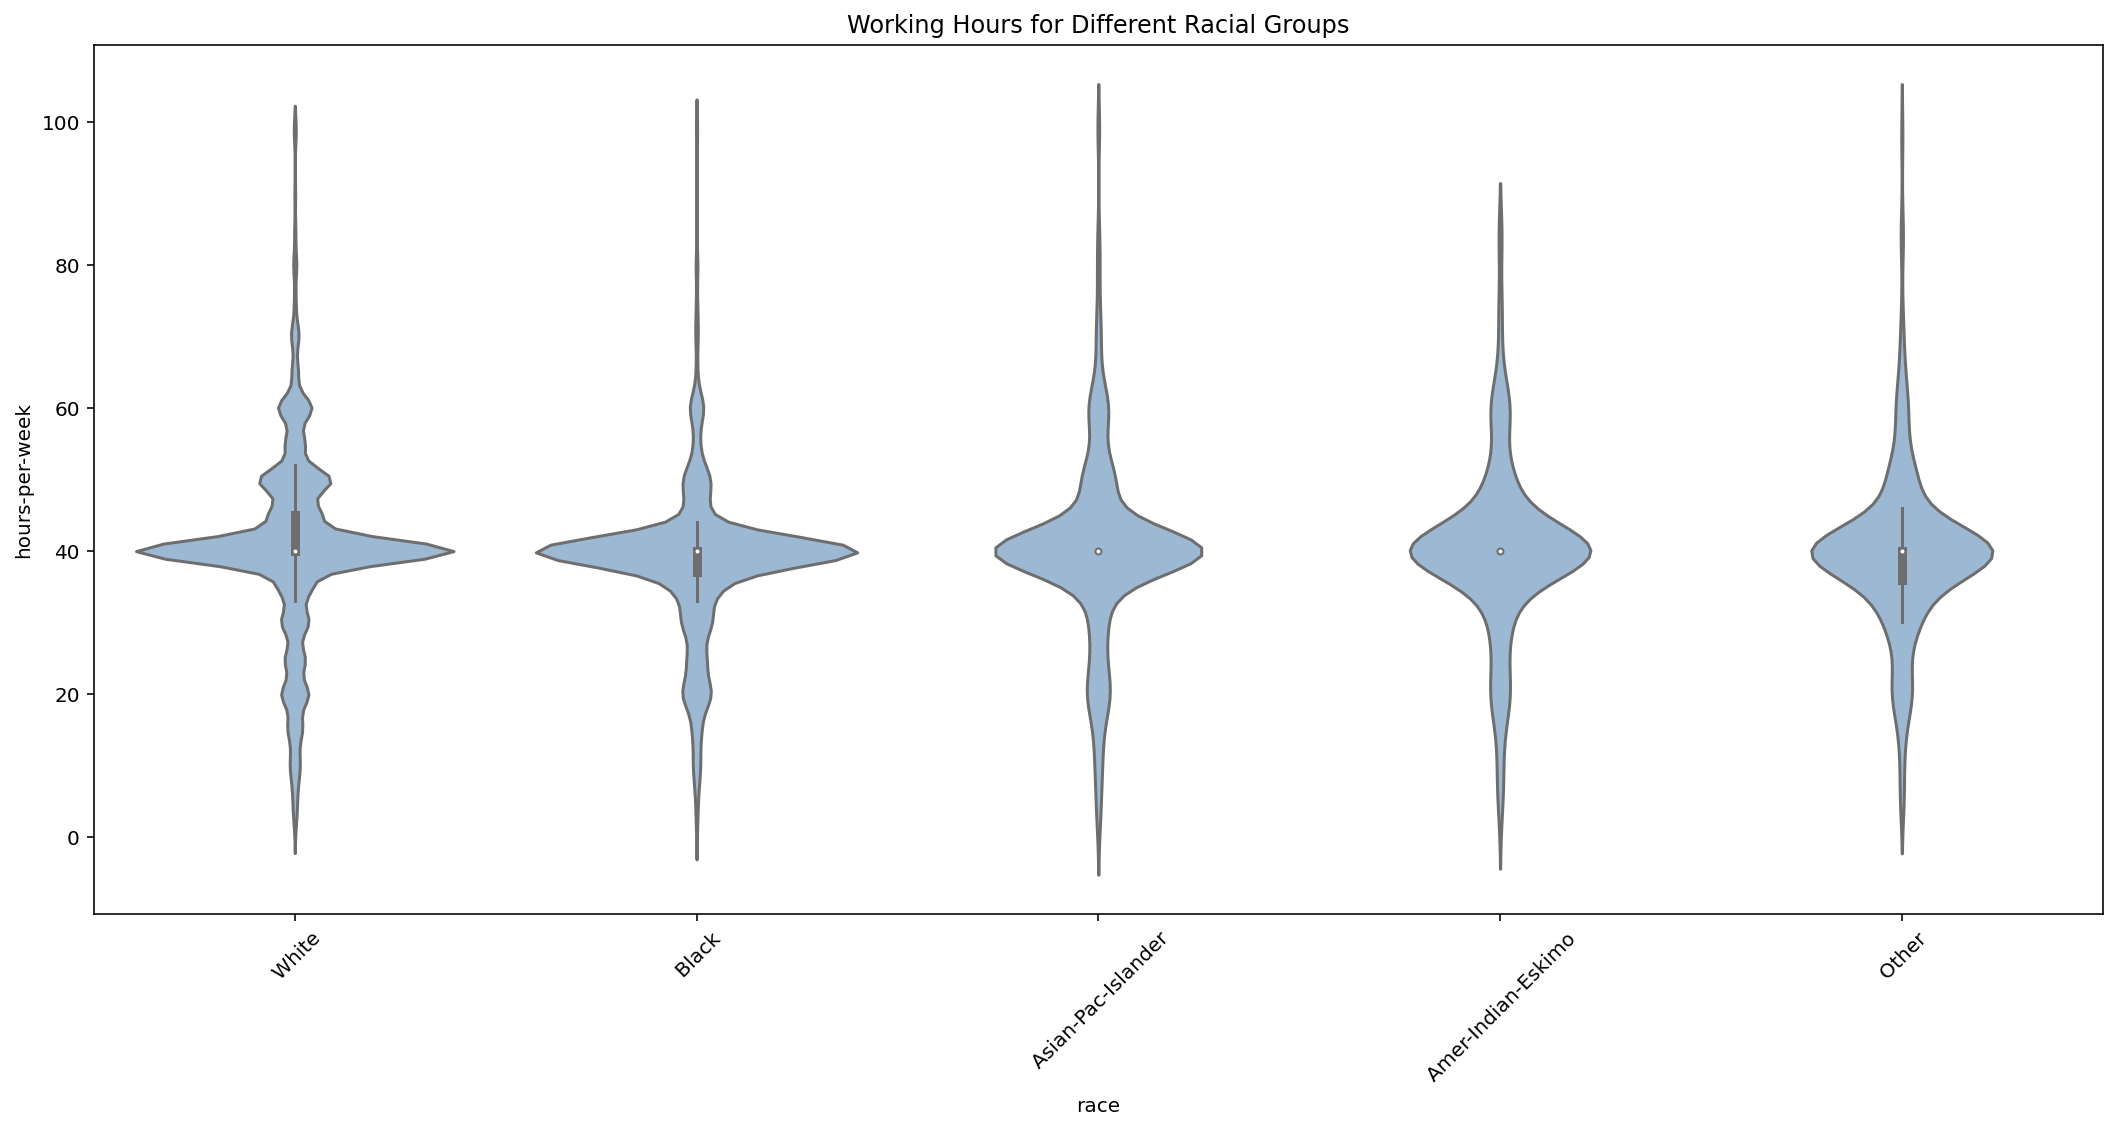

In [218]:
fig, ax = plt.subplots(figsize=(18,8))

ax.set_xticklabels(train['race'].unique(), rotation=45)
ax.set_title("Working Hours for Different Racial Groups")
sns.violinplot(x=train['race'], y=train['hours-per-week'], color=colors[1], ax=ax)
plt.show()

This is what we would expect since most full-time employees work around 40 hours per week. There is more variation in the working hours of White people, but this is most likely due to the abundance of data points.

Since we now know that each race works typically works the same number of hours per week, let's investigate further by looking at working hours by earnings.

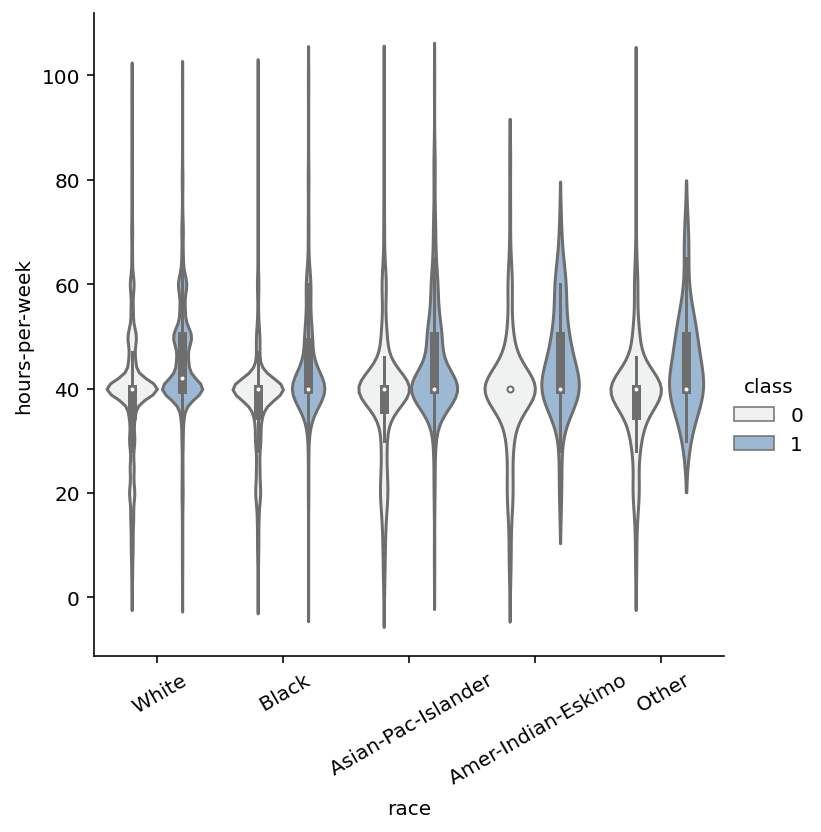

In [219]:
g = sns.catplot(x='race', y='hours-per-week', hue='class', data=train, color=colors[1], ax=ax, kind='violin')
g.set_xticklabels(rotation=30)
plt.show()

Here, a 1 represents a high earner and a 0 represents a low earner. It would appear that even across racial groups, high earning individuals work more hours per week than low earning individuals, though only slightly.

Let's look at the distribution of wealth across our target variable.

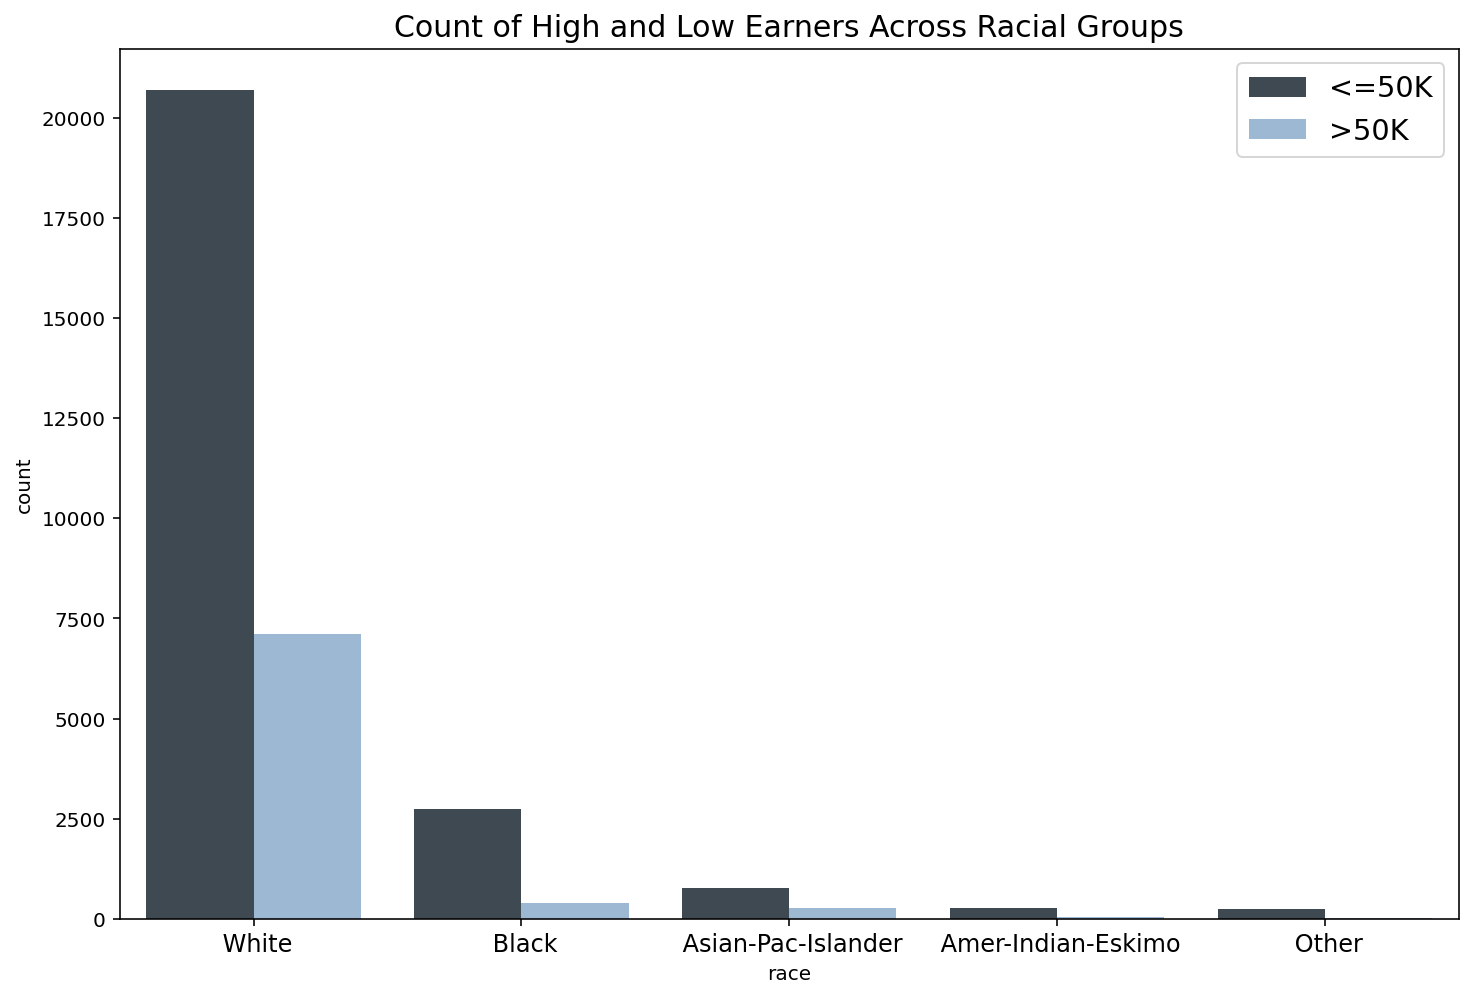

In [220]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title("Count of High and Low Earners Across Racial Groups", fontsize=15)
sns.countplot(x='race', hue='class', data=train, palette=colors)
ax.legend(['<=50K','>50K'], fontsize='x-large')
ax.set_xticklabels(ax.get_xticklabels(), size=12)

plt.show()

We can see the data disparity and proportion disparities of high and low earning individuals. There is much less data for minority groups, but the data that is here shows that the proportion of White people making over 50K to under 50K is much larger than the same proportion for every other minority group.

To wrap up, we will take a look at a heatmap of individuals race, education and capital gain to get a deeper understanding of socio-economic distinctions. In order to generate the data for this heatmap, we will first remove some outliers from the capital gain features. Then, we will find the average capital-gain per race-education pair, and unstack the dataframe to create a grid of values. We also enforce an order on the x-axis so you can see the order of education from left to right. I attempted min-max scaling the values across each education level, but that created only 5 possible values for each column and so the graph became harder to read. 

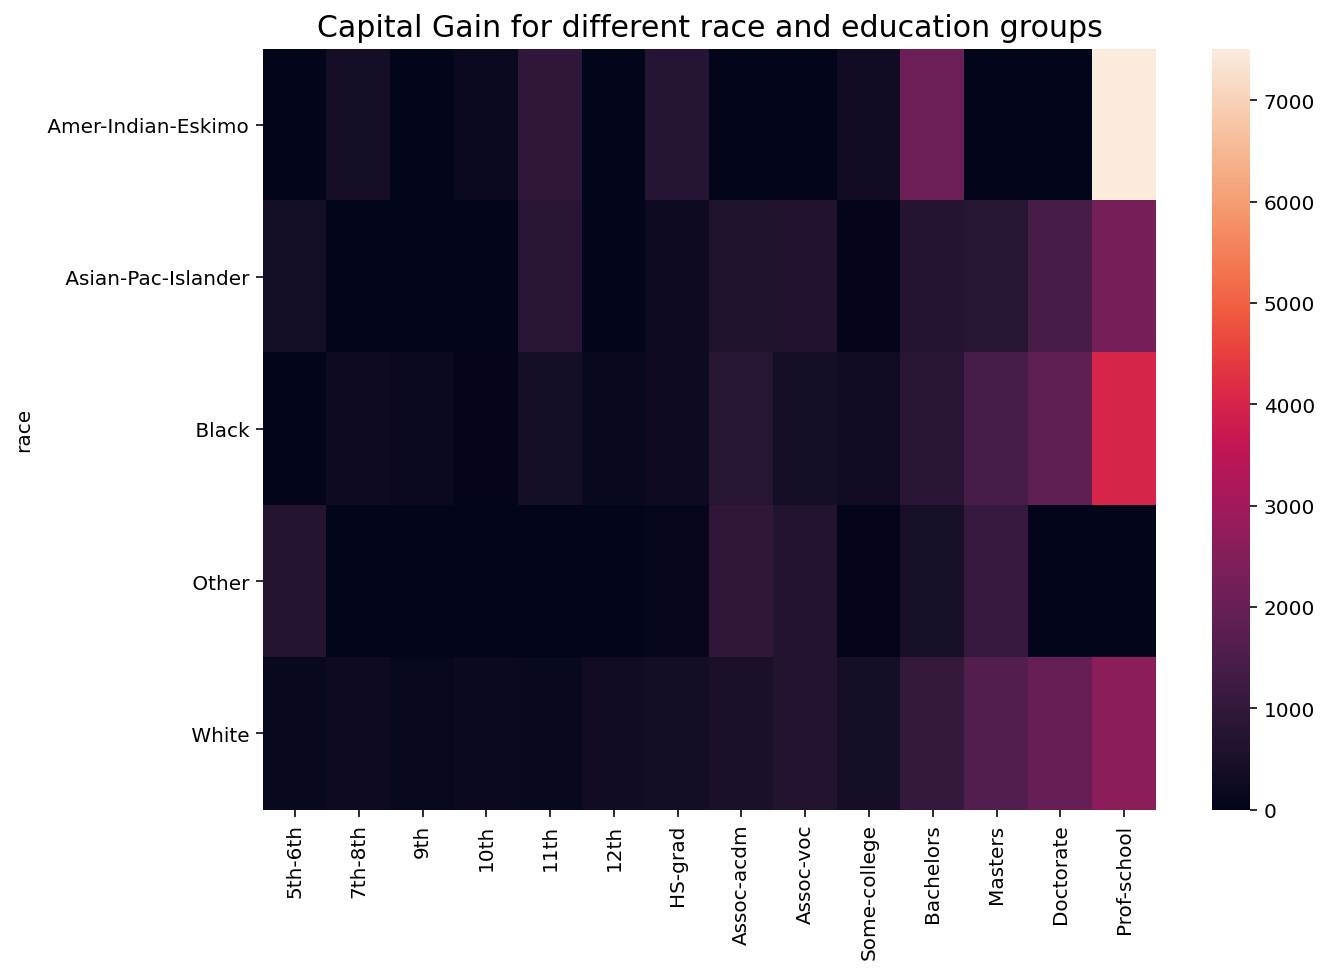

In [9]:
train = train.loc[~(train['capital-gain'] == 99_999), :]

fig, ax = plt.subplots(figsize=(10,7))

grid_vals = train.groupby(['race','education']).mean('capital-gain')['capital-gain'].unstack()
grid_vals.columns = [col.strip() for col in grid_vals.columns]
correct_grade_order = [
    '5th-6th',
    '7th-8th',
    '9th',
    '10th',
    '11th',
    '12th',
    'HS-grad',
    'Assoc-acdm',
    'Assoc-voc',
    'Some-college',
    'Bachelors',
    'Masters',
    'Doctorate',
    'Prof-school'
]
heatmap_data = grid_vals[correct_grade_order]
ax.set_title("Capital Gain for different race and education groups", fontsize=15)
sns.heatmap(heatmap_data, ax=ax)
plt.savefig('heatmap.png', dpi=200, bbox_inches='tight')
plt.show()

From this plot we can gather that most people did not have much if any capital gain this past fiscal period. Since our target variable is salary, we can assume that this data comes from a one year period. We can see clearly that a higher education level often led to higher capital gain. American-Indian-Eskimos and Black people with Professional Degrees had the highest average capital-gain of any group sitting at approx. 7,000 and 4,000 USD respectively. White, Black and Asian-Pacific Islander individuals had the most obvious gradient of capital-gain with increasing education levels. Interestingly, even though American-Indian-Eskimos and Asian-Pacific Islanders had the least amount of data, their High Schoolers had the highest capital gain among all other High Schoolers.

## Big Takeaways
Through lots of exploratory visualization, there are many considerations to make if one wants to use the data as input for a Machine Learning model:
1) __The lack of data for some demographic groups__. The majority of individuals in this dataset are primarily white and from the United States. The United States is a diverse country with wide ethnic and socio-economic representation. There are simply not enough samples from minority groups for any model to properly predict wealth.
2) __There is a wage gap across many different groups__. It is clear that the proportion of white males making over 50K to under 50K a year is much larger than almost every other group. Men dominate the over 50K category compared to all other women, and White individuals in general have a higher ratio of high to low earners than any other ethnic group represented. Also, most high earning individuals were Executives, Managers, or performed some Professional Specialty. 